<div style="direction:rtl;line-height:300%;">
<font face="XB Zar" size=5>
<div align=center>
    <font size=6>
    باسمه تعالی
    </font>
    <br><br>
    <font>
    درس بازیابی پیشرفته اطلاعات
    <br>
        <font size=3>
            مدرس: دکتر لشکری
        </font>
    </font>
    <br><br>
    <font>
        <b>فاز سوم پروژه</b>
    </font>
    <br>
    <font size=3>
    موعد تحویل: ۱۵ بهمن ۱۴۰۰
    </font>
    <br>
    <font size=4>
    دستیاران آموزشی:
        سجاد فقفورمغربی،
        علی بالاپور
    </font>
    <br>
        <font size=2>
        دانشگاه صنعتی شریف
        <br>
        دانشکده مهندسی کامپیوتر
    </font>
</div>
</font>
</div>

<div style="direction:rtl;line-height:200%;">
<font face="XB Zar" size=3>
    <div align=center>
        <b>نام اعضای گروه</b>: مهسا امانی، یاسمن شیخان، زهرا یوسفی جمارانی
        <br>
        <b>شماره‌ی دانشجویی اعضای گروه</b>: 97105769، 97101915، 97102717
        <br>
    </div>
</font>
</div>

<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    <h1>مقدمه</h1>
هدف این پروژه پیاده‌سازی الگوریتم‌های طبقه‌بندی و خوشه‌بندی، طراحی خزنده، و ارزش‌گذاری مقالات و رتبه‌بندی نویسنده‌ها بر اساس اطلاعات جمع‌آوری‌شده توسط خزنده است. <br>
برای انجام این پروژه، نکات زیر را در نظر داشته باشید:
    <ul>
        <li> انجام این فاز از پروژه به صورت گروهی می‌باشد.</li>
        <li>تمامی پیاده‌سازی‌ها باید با زبان پایتون صورت گیرند.</li>
        <li>محدودیت استفاده از کتاب‌خانه‌های آماده در هر بخش مشخص شده است.</li>
        <li>توجه داشته باشید که خروجی و دقت مدل‌ها، خروجی اطلاعات crawler و ... تأثیری در ارزیابی این فاز از پروژه ندارند و ارزشیابی صرفاً بر اساس پیاده‌سازی درست موارد خواسته‌شده می‌باشد.
</li>
        <li>در مجموع این پروژه 130 نمره بوده که 30 نمره از آن امتیازی می‌باشد.</li>
    </ul>
    </font>
</div>

<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    <h1>طبقه‌بندی و خوشه‌بندی (50 + 20 نمره)</h1>
    در این بخش از پروژه قصد داریم طبقه‌بندی و خوشه‌بندی را روی داده‌های متنی موجود در دیتاست 
    <a href='https://www.kaggle.com/amananandrai/ag-news-classification-dataset?select=train.csv'>AG News</a>
    انجام دهیم. این دیتاست شامل 120000 نمونه در داده آموزش و 7600 نمونه در داده تست می‌باشد. برای این قسمت پروژه، تنها از 10 درصد داده‌های دیتاست آموزش، استفاده می‌گردد و از تمامی داده‌های دیتاست تست، برای بررسی عملکرد مدل‌ها استفاده می‌شود. <br>
    داده‌های این دیتاست از سه بخش تشکیل شده‌اند: عنوان خبر، متن خبر، و دسته‌ی خبر.<br>
    داده‌ها (خبرها) در این دیتاست 4 دسته می‌باشند که این دسته‌ها به‌صورت زیرند:
<ul>
  <li>World : 0</li>
  <li>Sports : 1</li>
  <li>Business : 2</li>
  <li>Sci/Tech : 3</li>
</ul>
</font>
</div>

<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    <h2>آماده‌سازی داده</h2>
</font>
</div>

In [ ]:
import numpy as np
import pandas as pd

In [1]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
base_dir = '/content/drive/MyDrive/MIR/Phase3/'

In [ ]:
train_df = pd.read_csv(base_dir + 'data/train.csv', index_col=0)
test_df = pd.read_csv(base_dir + 'data/test.csv', index_col=0)

In [ ]:
train_df.head()

,label,title,description
0,2,Oil and Economy Cloud Stocks' Outlook,NEW YORK (Reuters) - Soaring crude prices plu...
1,2,Saudi Arabia to open up oil taps,Saudi Arabia says it is ready to push an extra...
2,2,Quality Gets Swept Away,Quality Distribution is hammered after reporti...
3,2,More Big Boobs in Playboy,An interview with Google's co-founders due out...
4,2,Paid Search Growth May Slow,A new Internet advertising forecast shows a sl...


In [ ]:
test_df.head()

,label,title,description
0,2,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,3,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,3,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,3,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,3,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [ ]:
len(train_df), len(test_df)

(12105, 7600)

<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
با توجه به اینکه نمی‌توان مدل‌های طبقه‌بندی و خوشه‌بندی را به‌طور مستقیم بر روی داده‌های متنی آموزش داد و آزمود، در ابتدا باید این داده‌ها را به شکل عددی تبدیل کنیم. برای این کار روش‌های مختلفی وجود دارد. یکی از این روش‌ها، استفاده از  الگوریتم tf-idf و اعمال تجزیه SVD (به‌منظور کاهش ابعاد) برای ایجاد embedding متناظر با متن می‌باشد. با استفاده از قطعه کد زیر، عملیات گفته‌شده را اجرا می‌کنیم.     
</font>
</div>

In [ ]:
import typing as th
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
import string


VECTOR_SIZE = 128
NUMERICS = ''.join(str(i) for i in range(10))
TRANSLATOR = str.maketrans('', '', NUMERICS + string.punctuation)


class Preprocessor(BaseEstimator, TransformerMixin):
    def init(self):
        pass
    
    def fit(self, x, y=None, **params):
        return self
    
    def fit_transform(self, x, y=None, **params):
        return self.fit(x, y, **params).transform(x)
    
    def transform(self, x):
        x_copy = x.copy()
        x_copy['title'] = (x['title'].map(str)).apply(
            lambda item: item.translate(TRANSLATOR).lower()                       
        )
        x_copy['description'] = (x['description'].map(str)).apply(              
            lambda item: item.translate(TRANSLATOR).lower()
        )
        x_copy['combination'] = (x['title'].map(str) + ' ' + x['description'].map(str)).apply(
            lambda item: item.translate(TRANSLATOR).lower()                       
        )
        x_copy['title-split'] = x_copy['title'].apply(lambda item: item.split())                
        x_copy['description-split'] = x_copy['description'].apply(lambda item: item.split())
        x_copy['combination-split'] = x_copy['combination'].apply(lambda item: item.split())    
        return x_copy


title_tf_idf_vectorizer = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('pca', TruncatedSVD())
])

description_tf_idf_vectorizer = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('pca', TruncatedSVD())
])

combination_tf_idf_vectorizer = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('pca', TruncatedSVD())
])


class Vectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=VECTOR_SIZE):
        self.n_components = n_components
        
        # title parameters
        self.title_tfidf = dict()
        
        # description parameters
        self.description_tfidf = dict()

        # combination parameters
        self.combination_tfidf = dict()
        
        # title vectorizers
        self.title_tfidf_vectorizer = title_tf_idf_vectorizer
        self.title_tfidf_vectorizer.set_params(**self.title_tfidf)
        
        # description vectorizers
        self.description_tfidf_vectorizer = description_tf_idf_vectorizer
        self.description_tfidf_vectorizer.set_params(**self.description_tfidf)

        # combination vectorizers
        self.combination_tfidf_vectorizer = description_tf_idf_vectorizer
        self.combination_tfidf_vectorizer.set_params(**self.description_tfidf)
        
    def fit(self, x, y=None):
        # finalizing title parameters
        self.title_tfidf['pca__n_components'] = self.title_tfidf.get('pca__n_components', self.n_components)
        self.title_tfidf_vectorizer.set_params(**self.title_tfidf)
        
        # finalizing description parameters
        self.description_tfidf['pca__n_components'] = self.description_tfidf.get('pca__n_components', self.n_components)
        self.description_tfidf_vectorizer.set_params(**self.description_tfidf)

        # finalizing combination parameters
        self.combination_tfidf['pca__n_components'] = self.combination_tfidf.get('pca__n_components', self.n_components)
        self.combination_tfidf_vectorizer.set_params(**self.combination_tfidf)
        
        # fitting models
        self.title_tfidf_vectorizer.fit(x['title'])
        self.description_tfidf_vectorizer.fit(x['description'])
        self.combination_tfidf_vectorizer.fit(x['combination'])
        return self

    def transform(self, x):
        x_copy = x.copy()
        x_copy['vec_1'] = self.title_tfidf_vectorizer.transform(x['title']).tolist()
        x_copy['vec_2'] = self.description_tfidf_vectorizer.transform(x['description']).tolist()
        x_copy['vec_3'] = self.combination_tfidf_vectorizer.transform(x['combination']).tolist()
        x_copy = x_copy.drop(columns=['title',
                                      'description',
                                      'title-split',
                                      'description-split',
                                      'combination',
                                      'combination-split'])
        return x_copy

    def fit_transform(self, x, y=None, **fit_params):
        return self.fit(x, y).transform(x)

<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
قطعه کد بالا، یک دیتافریم جدید با 4 ستون ایجاد می‌کند که این ستون‌ها شامل: برچسب خبر (label)، بردار تولیدشده برای ستون عنوان خبر (vec_1)، بردار تولیدشده برای ستون متن خبر (vec_2)، و بردار تولیدشده برای ترکیب متن و عنوان خبر (vec_3). <br>
    برای تولید این دیتافریم، در یک مرحله پیش‌پردازش روی داده‌های متنی دیتافریم ابتدایی انجام می‌شود که شامل case folding، حذف علائم نگارشی و اعداد، و tokenization است. سپس بر روی داده‌های متنی پیش‌پردازش شده، با استفاده از الگوریتم tf-idf و اعمال TruncatedSVD، بردارهای هر داده متنی را تولید می‌نماییم. به‌طور کلی به این روش (تولید بردار با استفاده از tf-idf و SVD) Latent Semantic Analysis گفته می‌شود. برای مطالعه بیشتر می‌توانید 
    <a href='https://towardsdatascience.com/lovecraft-with-natural-language-processing-part-4-latent-semantic-analysis-70aa2fa2161b'>این</a>
    و 
    <a href='https://mccormickml.com/2016/03/25/lsa-for-text-classification-tutorial/'>این</a>
    را بررسی کنید.
</font>
</div>




In [ ]:
preprocessor = Pipeline(steps=[
    ('preprocess', Preprocessor()),
    ('vectorizer', Vectorizer())
])
preprocessor.fit(train_df)
train_data = preprocessor.transform(train_df).dropna()
test_data = preprocessor.transform(test_df).dropna()

train_data.head(2)

,label,vec_1,vec_2,vec_3
0,2,"[0.08125272862325773, -0.0066801978293423644, ...","[0.2418105501864031, 0.13462785010189954, 0.00...","[0.23430001043913815, 0.22338888392714187, -0...."
1,2,"[0.15750191227538107, -0.11621424552154558, -0...","[0.16799963671680967, 0.1315694995289596, 0.03...","[0.16055589717351998, 0.1754272263979711, 0.01..."


<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    در این بخش، قسمتی از داده آموزش را جدا کرده و تحت عنوان داده validation ذخیره می‌نماییم. با استفاده از داده validation به اعتبارسنجی عملکرد مدل پرداخته و در انتها، پس از تنظیم مدل از داده تست برای بررسی نهایی عملکرد استفاده می‌نماییم.
</font>
</div>

In [ ]:
from sklearn.model_selection import train_test_split

train_split, val_split = train_test_split(train_data, test_size=0.1)

train_split = train_split.dropna()
val_split = val_split.dropna()

In [ ]:
train_split.shape, val_split.shape

((10894, 4), (1211, 4))

In [ ]:
Models = {}

<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    <h2>طبقه‌بندی (30+10 نمره)</h2>
    در این بخش سه مدل Naïve Bayes، k-Nearest Neighbors و SVM را بررسی می‌کنیم. به ازای هر یک، در ابتدا مدل را با استفاده از داده train، آموزش داده و سپس با استفاده از داده validation، به بررسی کلی عملکرد و تنظیم هایپرپارامتر و ویژگی‌های مدل می‌پردازید و بهترین مدل را با توجه به صحت (accuracy) مدل انتخاب می‌کنید. در بخش ارزیابی به بررسی عملکرد مدل‌های انتخاب‌شده بر روی داده test بر اساس معیارهای گفته‌شده، می‌پردازید. <br>
    توجه داشته باشید که به ازای هر خبر، سه نوع embedding متناظر با آن خبر داریم و درنتیجه به ازای هر الگوریتم، باید سه مدل را به عنوان مدل نهایی انتخاب نمایید. یعنی 9 مدل در انتها باید بر روی داده test متناظر بررسی شوند. این مدل‌ها به‌صورت زیر می‌باشند:
<ul>
    <li>مدل naïve bayes آموزش داده شده روی ستون vec_1 یا embedding حاصل از عنوان خبر</li>
    <li>مدل naïve bayes آموزش داده شده روی ستون vec_2 یا embedding حاصل از متن خبر</li>
    <li>مدل naïve bayes آموزش داده شده روی ستون vec_3 یا embedding حاصل از ترکیب عنوان و متن خبر</li>
    <li>مدل knn آموزش داده شده روی ستون vec_1 یا embedding حاصل از عنوان خبر</li>
    <li>مدل knn آموزش داده شده روی ستون vec_2 یا embedding حاصل از متن خبر</li>
    <li>مدل knn آموزش داده شده روی ستون vec_3 یا embedding حاصل از ترکیب عنوان و متن خبر</li>
    <li>مدل svm  آموزش داده شده روی ستون vec_1 یا embedding حاصل از عنوان خبر</li>
    <li>مدل svm آموزش داده شده روی ستون vec_2 یا embedding حاصل از متن خبر</li>
    <li>مدل svm آموزش داده شده روی ستون vec_3 یا embedding حاصل از ترکیب عنوان و متن خبر</li>
</ul>
    
</font>
</div>

<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    <h3>الگوریتم Naïve Bayes (8 نمره)</h3>
الگوریتم Naïve Bayes را از ابتدا پیاده‌سازی کنید و روی داده train، آموزش دهید. سپس با تنظیمات دلخواه (نوع توزیع استفاده‌شده، مقدار smoothing  و ...) مدل را روی داده validation اعتبارسنجی کرده و مدل را ذخیره کنید. <br>
توجه: از کتابخانه‌هایی مانند pandas, numpy و ... برای پیاده‌سازی می‌توانید استفاده کنید. البته این استفاده باید در راستای پیاده‌سازی مدل باشد. یعنی برای مثال  نمی‌توانید از ماژول‌ها و کلاس‌هایی مانند sklearn.naive_bayes.GaussianNB برای این قسمت استفاده کنید! اما استفاده از سایر توابع و کتابخانه‌های sklearn مانند GridSearchCV مجاز می‌باشد (و حتی توصیه می‌گردد).
    
</font>
</div>

Bernoulli Naive Bayes:

\begin{equation*}
P(x) = 
\begin{cases}
p, &\text{if $x = 1$} \\
1 - p, &\text{if $x = 0$} \\
\end{cases}
\end{equation*}

Gaussian Naive Bayes:

\begin{equation*}
\frac{1}{\sqrt{2\pi\sigma_y^2}}\, exp{({-\frac{(x_i-\mu_y)^2}{2\sigma_y^2}})}
\end{equation*}

In [ ]:
import typing as th
from sklearn.base import BaseEstimator, ClassifierMixin
import math

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class NaiveBayes(BaseEstimator, ClassifierMixin):
    def __init__(self, kind, num_labels=4, alpha=0.05, tst="mean"):
        self.kind = kind
        self.num_labels = num_labels
        self.alpha = alpha
        self.ts_type = tst
        self.prior = []
        self.word_per_class_probs = []

    def fit(self, x, y):
        y = np.array(y)
        X = np.array([np.array(l) for l in x])
        if self.ts_type == "mean":
            self.threshold = np.mean(X, axis = 0)
        elif self.ts_type == "median":
            self.threshold = np.median(X, axis = 0)

        priors = []
        if self.kind == 'Bernoulli':
            # prior logs
            for k in range(self.num_labels):
                priors.append(sum(y == k) / len(y))
            self.prior = np.log(np.array(priors))

            # prob calculation
            for k in range(self.num_labels):
                x_k = X[y == k]
                p = (x_k > self.threshold).sum() / (x_k.shape[0] * x_k.shape[1])
                self.word_per_class_probs.append(p)

            for i in range(len(self.word_per_class_probs)):
                self.word_per_class_probs[i] = (1 - self.alpha) * self.word_per_class_probs[i] + (self.alpha) * 0.01

        elif self.kind == 'Gaussian':
            # prior logs
            means = []
            stds = []
            for k in range(self.num_labels):
                priors.append(sum(y == k) / len(y))
                means.append(np.mean(np.array([np.array(l) for l in X[y == k]]), axis=0))
                stds.append(np.std(np.array([np.array(l) for l in X[y == k]]), axis=0))
                
            self.prior = np.log(np.array(priors))
            self.means = means
            self.stds = stds

        return self


    def predict(self, x):
        preds = []
        X = np.array([np.array(l) for l in x])
        if self.kind == 'Bernoulli':
            for i in range(X.shape[0]):
                post_probs = []
                for k in range(self.num_labels):
                    post_probs.append(self.prior[k] 
                                      + ((X[i, :] > self.threshold).dot(np.log(self.word_per_class_probs[k])).sum() 
                                      + ((X[i, :] <= self.threshold).dot(np.log(1 - self.word_per_class_probs[k]))).sum()))
                
                pred_label = np.argmax(post_probs)
                preds.append(pred_label)

        elif self.kind == 'Gaussian':
            for i in range(X.shape[0]):
                post_probs = []
                for k in range(self.num_labels):
                    e = np.exp(-1 / 2 * ((X[i, :] - self.means[k]) / self.stds[k]) ** 2)
                    factor = 1 / (math.sqrt(2 * math.pi) * self.stds[k])
                    p = np.log(factor * e)
                    post_probs.append(self.prior[k] + sum(p))
                
                pred_label = np.argmax(post_probs)
                preds.append(pred_label)
        return preds

    def accuracy(self, y_true, y_pred):
        correct = sum(y_true == y_pred)
        return correct / len(y_true)


In [ ]:
Models["nb"] = [None, None, None]
tt = {1: "Title", 2: "Text", 3: "Title-Text"}

# parameters
kinds = ["Gaussian", "Bernoulli"]
tss = ["mean", "median"]
alphas = [0.05, 0.1, 0.2]



for i in range(1,4):
    print("Training on vec_" + str(i) + "/" + tt[i] + "...")
    best_acc = 0
    for kind in kinds:
        for alpha in alphas:
            for ts in tss:
                acc = 0
                model_nb = NaiveBayes(kind, 4, alpha, ts)
                model_nb = model_nb.fit(train_split["vec_" + str(i)], train_split["label"])
                preds = model_nb.predict(val_split["vec_" + str(i)])
                acc = model_nb.accuracy(val_split["label"], preds)
                if acc > best_acc:
                    best_acc = acc
                    Models["nb"][i-1] = model_nb
                print(f"\tParameters -> Distribution type: {kind}, Alpha: {alpha},  Threshold type: {ts} -> Accuracy: {acc}")
    print(f'Best achieved accuracy of {tt[i]} is {best_acc} with kind = {Models["nb"][i-1].kind}, alpha = {Models["nb"][i-1].alpha}, Threshold type: {Models["nb"][i-1].ts_type}\n')


Training on vec_1/Title...
	Parameters -> Distribution type: Gaussian, Alpha: 0.05,  Threshold type: mean -> Accuracy: 0.4847233691164327
	Parameters -> Distribution type: Gaussian, Alpha: 0.05,  Threshold type: median -> Accuracy: 0.4847233691164327
	Parameters -> Distribution type: Gaussian, Alpha: 0.1,  Threshold type: mean -> Accuracy: 0.4847233691164327
	Parameters -> Distribution type: Gaussian, Alpha: 0.1,  Threshold type: median -> Accuracy: 0.4847233691164327
	Parameters -> Distribution type: Gaussian, Alpha: 0.2,  Threshold type: mean -> Accuracy: 0.4847233691164327
	Parameters -> Distribution type: Gaussian, Alpha: 0.2,  Threshold type: median -> Accuracy: 0.4847233691164327
	Parameters -> Distribution type: Bernoulli, Alpha: 0.05,  Threshold type: mean -> Accuracy: 0.2774566473988439
	Parameters -> Distribution type: Bernoulli, Alpha: 0.05,  Threshold type: median -> Accuracy: 0.29562345169281584
	Parameters -> Distribution type: Bernoulli, Alpha: 0.1,  Threshold type: mean

<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    <h3>الگوریتم k-Nearest Neighbors (8 نمره)</h3>
الگوریتم KNN را از ابتدا پیاده‌سازی کنید و روی داده train، آموزش دهید. سپس با تنظیمات دلخواه (مقدار k، معیار محاسبه فاصله و ...) مدل را روی داده validation اعتبارسنجی کرده و مدل را ذخیره کنید. <br>
توجه: مانند توجه قسمت قبل    
</font>
</div>

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from collections import Counter
from scipy import spatial

class KNN(BaseEstimator, ClassifierMixin):
    def __init__(self, k, distance_measure):
        self.k = k
        self.distance_measure = distance_measure

    def fit(self, X, y):
        self.X_train = np.array([np.array(l) for l in X])
        self.y_train = np.array(y)
        return self

    def predict(self, x):
        preds = []
        X = np.array([np.array(l) for l in x])
        for i in range(X.shape[0]):
            if self.distance_measure == "Cosine":
                d = np.dot(self.X_train, X[i, :])
                if np.linalg.norm(X[i, :]) != 0:
                    d /= np.linalg.norm(X[i, :])
                d /= np.linalg.norm(self.X_train, axis=1)
                dist = 1 - d
            elif self.distance_measure == "Manhattan":
                dist = np.abs(np.subtract(self.X_train, X[i, :])).sum(axis=1)
            elif self.distance_measure == "Euclidean":
                dist = np.power(np.subtract(self.X_train, X[i, :]), 2).sum(axis=1)
            

            idxs = np.argpartition(dist, self.k)
            y_preds = self.y_train[idxs[:self.k]]
            preds.append(Counter(y_preds).most_common(1)[0][0])
        return preds

    def accuracy(self, y_true, y_pred):
        correct = sum(y_true == y_pred)
        return correct / len(y_true)

In [ ]:
Models["knn"] = [None, None, None]
tt = {1: "Title", 2: "Text", 3: "Title-Text"}

# parameters
ks = [10, 20, 30, 40, 50, 60, 70, 80]

distance_measures = ["Cosine", "Manhattan", "Euclidean"]

for i in range(1,4):
    print("Training on vec_" + str(i) + "/" + tt[i] + "...")
    best_acc = 0
    for k in ks:
        for dm in distance_measures:
            acc = 0
            model_knn = KNN(k, dm)
            model_knn = model_knn.fit(train_split["vec_" + str(i)], train_split["label"])
            pred = model_knn.predict(val_split["vec_" + str(i)])
            acc = model_knn.accuracy(val_split["label"], pred)
            if acc > best_acc:
                best_acc = acc
                Models["knn"][i-1] = model_knn
            print(f"Parameters -> K: {k}, Distance Measure: {dm} -> Accuracy: {acc}")
    print(f'Best achieved accuracy of {tt[i]} is {best_acc} with K = {Models["knn"][i-1].k}, Distance Measure = {Models["knn"][i-1].distance_measure}')


Training on vec_1/Title...
Parameters -> K: 20, Distance Measure: Cosine -> Accuracy: 0.5780346820809249
Parameters -> K: 20, Distance Measure: Manhattan -> Accuracy: 0.5821635012386458
Parameters -> K: 20, Distance Measure: Euclidean -> Accuracy: 0.5524360033030553
Parameters -> K: 30, Distance Measure: Cosine -> Accuracy: 0.5706028075970272
Parameters -> K: 30, Distance Measure: Manhattan -> Accuracy: 0.5755573905862923
Parameters -> K: 30, Distance Measure: Euclidean -> Accuracy: 0.5483071841453344
Parameters -> K: 40, Distance Measure: Cosine -> Accuracy: 0.5714285714285714
Parameters -> K: 40, Distance Measure: Manhattan -> Accuracy: 0.5805119735755574
Parameters -> K: 40, Distance Measure: Euclidean -> Accuracy: 0.5466556564822461
Parameters -> K: 50, Distance Measure: Cosine -> Accuracy: 0.5829892650701899
Parameters -> K: 50, Distance Measure: Manhattan -> Accuracy: 0.5664739884393064
Parameters -> K: 50, Distance Measure: Euclidean -> Accuracy: 0.5383980181668043
Parameters ->

<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    <h3>الگوریتم SVM (6 نمره)</h3>
در این بخش، با استفاده از کتابخانه sklearn و مدل SVC موجود در این کتابخانه، این مدل را روی داده train آموزش داده و سپس بر روی داده validation اعتبارسنجی نمایید و بهترین مدل را انتخاب کنید. 
</font>
</div>

In [ ]:
from sklearn import svm

def accuracy(true, pred):
    correct = sum(true == pred)
    return correct / len(true)

Models["svm"] = [None, None, None]
tt = {1: "Title", 2: "Text", 3: "Title-Text"}

# parameters
Cs = [1.5, 1, 0.5, 0.1, 0.01]
kernels = ["linear", "poly", "sigmoid", "rbf"]

for i in range(1,4):
    print("Training on vec_" + str(i) + "/" + tt[i] + "...")
    best_acc = 0
    for c in Cs:
        for kernel in kernels:
            acc = 0
            model_svm = svm.SVC(C=c, kernel=kernel)
            model_svm = model_svm.fit(np.array([np.array(l) for l in train_split["vec_" + str(i)]]), np.array([np.array(l) for l in train_split["label"]]))
            preds = model_svm.predict(np.array([np.array(l) for l in val_split["vec_" + str(i)]]))
            acc = accuracy(np.array([np.array(l) for l in val_split["label"]]), preds)
            if acc > best_acc:
                best_acc = acc
                Models["svm"][i-1] = model_svm
            print(f"Parameters -> C: {c}, Kernel: {kernel} -> Accuracy: {acc}")
    print(f'Best achieved accuracy of {tt[i]} is {best_acc} with C = {Models["svm"][i-1].C}, Kernel = {Models["svm"][i-1].kernel}\n')


Training on vec_1/Title...
Parameters -> C: 1.5, Kernel: linear -> Accuracy: 0.6655656482246077
Parameters -> C: 1.5, Kernel: poly -> Accuracy: 0.5722543352601156
Parameters -> C: 1.5, Kernel: sigmoid -> Accuracy: 0.6407927332782825
Parameters -> C: 1.5, Kernel: rbf -> Accuracy: 0.6985962014863749
Parameters -> C: 1, Kernel: linear -> Accuracy: 0.653179190751445
Parameters -> C: 1, Kernel: poly -> Accuracy: 0.5656482246077622
Parameters -> C: 1, Kernel: sigmoid -> Accuracy: 0.6498761354252683
Parameters -> C: 1, Kernel: rbf -> Accuracy: 0.694467382328654
Parameters -> C: 0.5, Kernel: linear -> Accuracy: 0.64822460776218
Parameters -> C: 0.5, Kernel: poly -> Accuracy: 0.5672997522708505
Parameters -> C: 0.5, Kernel: sigmoid -> Accuracy: 0.6655656482246077
Parameters -> C: 0.5, Kernel: rbf -> Accuracy: 0.6837324525185797
Parameters -> C: 0.1, Kernel: linear -> Accuracy: 0.6184971098265896
Parameters -> C: 0.1, Kernel: poly -> Accuracy: 0.5309661436829067
Parameters -> C: 0.1, Kernel: sig

<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    <h3>ارزیابی (8نمره)</h3>
    با استفاده از معیارهای ارزیابی زیر، عملکرد مدل را روی داده تست بررسی نمایید و مدل‌ها را با هم دیگر مقایسه کنید.
    <ul>
        <li>Accuracy</li>
        <li>Precision</li>
        <li>Recall</li>
        <li>F1-score</li>
        <li>Confusion Matrix</li>
    </ul>
    با توجه به اینکه مسئله طبقه‌بندی این پروژه از نوع چند کلاسه می‌باشد، از macro معیارهای ذکرشده، استفاده نمایید. توجه داشته باشید که می‌توانید از امکانات کتابخانه sklearn برای این قسمت استفاده نمایید.
</font>
</div>

In [ ]:
from sklearn import metrics

X_test = {}
X_test["vec_1"] = np.array([np.array(l) for l in test_data["vec_1"]])
X_test["vec_2"] = np.array([np.array(l) for l in test_data["vec_2"]])
X_test["vec_3"] = np.array([np.array(l) for l in test_data["vec_3"]])
y_test = np.array(list(test_data["label"].to_numpy()))

columns = ['Model Name', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'Confusion Matrix']
df = pd.DataFrame(columns=columns)

for i in range(1, 4):
    print("Testing on vec_" + str(i) + "/" + tt[i] + "...")
    for key, value in Models.items():
        model = Models[key][i-1]
        y_pred = model.predict(X_test["vec_" + str(i)])
        acc = metrics.accuracy_score(y_test, y_pred)
        precision = metrics.precision_score(y_test, y_pred, average="macro")
        recall = metrics.recall_score(y_test, y_pred, average="macro")
        f1 = metrics.f1_score(y_test, y_pred, average="macro")
        conf_matrix = metrics.confusion_matrix(y_test, y_pred)
        df.loc[len(df.index)] = [key + "_vec_" + str(i), acc, precision, recall, f1, conf_matrix]
        print("\tModel ", key, " done :)")

Testing on vec_1/Title...
	Model  nb  done :)
	Model  knn  done :)
	Model  svm  done :)
Testing on vec_2/Text...
	Model  nb  done :)
	Model  knn  done :)
	Model  svm  done :)
Testing on vec_3/Title-Text...
	Model  nb  done :)
	Model  knn  done :)
	Model  svm  done :)


In [ ]:
df.to_csv("/content/drive/MyDrive/MIR/Phase3/results.csv")

<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    <h3>مصورسازی (10 نمره امتیازی)</h3>
در این قسمت با استفاده از روش‌های کاهش ابعاد مانند PCA یا t-SNE داده‌های دیتاست را به یک فضایی با ابعاد پایین‌تر (2 یا 3 بعد) برده و سپس با استفاده از کتابخانه‌های مصورسازی پایتون، نمودارهای مرتبط به هر مدل را رسم نمایید. <br>
هیچ محدودیتی برای استفاده از کتابخانه های پایتون در این بخش وجود ندارد. همچنین هر نوع نمودار مرتبط و دارای محتوای قابل قبول، برای این بخش کافی می باشد. 
</font>
</div>

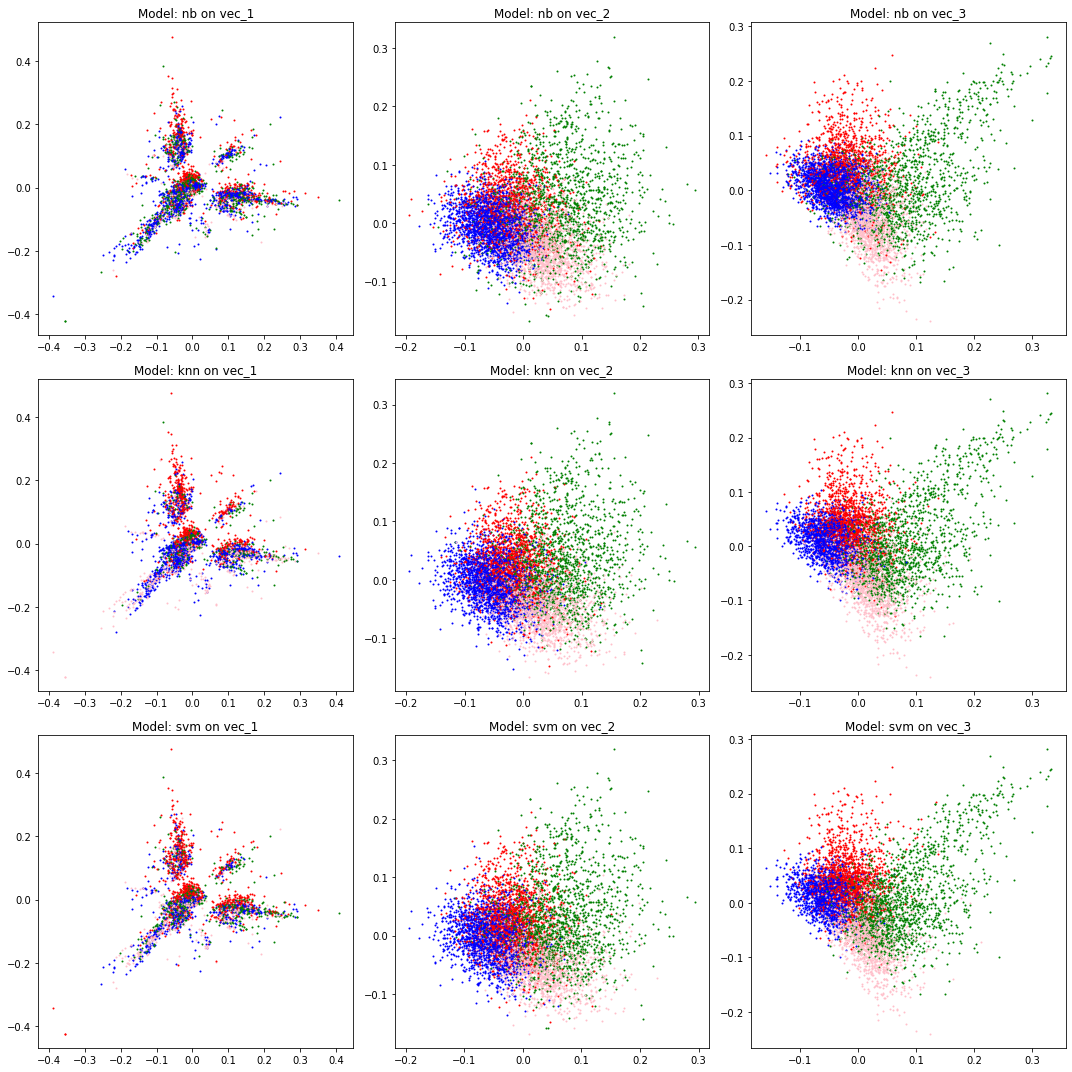

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

fig, ax = plt.subplots(3, 3)
fig.set_figwidth(15)
fig.set_figheight(15)

for i in range(1, 4):
    j = 0
    for key, value in Models.items():
        model = Models[key][i-1]
        y_pred = model.predict(X_test["vec_" + str(i)])
        reduced_data = PCA(n_components=2).fit_transform(X_test["vec_" + str(i)])  
        # print(type(reduced_data), len(reduced_data))          
        cluster_color_map = {0 : 'red', 1 : 'blue', 2 : 'green', 3 : 'pink' }
        for p in range(len(reduced_data)):
            ax[j, i-1].plot(reduced_data[p, 0], reduced_data[p, 1], "k.", markersize=2, c=cluster_color_map[y_pred[p]])
        ax[j, i-1].set_title("Model: " + str(key) + " on vec_" + str(i)) 
        j += 1

fig.tight_layout()

<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    <h2>خوشه‌بندی (20+10 نمره)</h2>
در این بخش می‌خواهیم دو مدل خوشه‌بندی k-means و Agglomerative Clustering را بررسی کنیم. خوشه‌بندی بر روی برچسب (label) هر خبر اجرا می‌شود. برای این قسمت، مرحله آموزش بر روی داده‌های آموزش انجام می‌شود و با استفاده از معیار purity، اعتبارسنجی روی داده‌های validation انجام می‌گردد. درنهایت نیز، مشابه قسمت طبقه‌بندی، به سنجش مدل روی داده تست می‌پردازیم. <br>
به همین منظور کد مربوط به محاسبه معیار purity را از ابتدا در این قسمت پیاده‌سازی کنید.
</font>
</div>

<div align= "justify" dir="rtl">
<font face="Calibri" size=4.5 color='deeppink'>
توضیح:
</font><br>
<font size=4>
طبق فرمول زیر برای purity، کد زیر را می‌نویسیم. از آرایه count برای محاسبه‌ی تعداد عضو هر لیبل در هر خوشه‌ای استفاده کرده و سپس برای هر خوشه، تعداد لیبل با بیشترین عضو را پیدا کرده و آن‌ها را جمع میکنیم. در آخر به تعداد کل تقسیم و خروجی میدهیم.
</font><br>
$$ Purity = \frac{1}{N}\sum_{i = 1}^{k} max^{}_j|c^{}_i ∩ t^{}_j| $$
</div>

In [ ]:
def purity_score(labels, clusters):
    count = []
    for i in range(max(clusters) + 1):
        lst = []
        for j in  range(max(labels) + 1):
            lst.append(0)
        count.append(lst)
         
    for i in range(len(labels)):
        count[clusters[i]][labels[i]] +=  1 
    sum_ = 0
    for i in range(len(count)): 
        sum_ += max(count[i])
    return sum_ / len(labels)

<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    توجه داشته باشید که مانند بخش طبقه‌بندی، لازم است که در انتها 6 مدل به عنوان مدل‌های نهایی برای بخش ارزیابی انتخاب شوند. این 6 مدل به صورت زیر می‌باشند:
    <ul>
        <li>مدل k-means آموزش داده شده روی ستون vec_1 یا embedding حاصل از عنوان خبر</li>
        <li>مدل k-means آموزش داده شده روی ستون vec_2 یا embedding حاصل از متن خبر</li>
        <li>مدل k-means آموزش داده شده روی ستون vec_3 یا embedding حاصل از ترکیب عنوان و متن خبر</li>
        <li>مدل Agglomerative Clustering آموزش داده شده روی ستون vec_1 یا embedding حاصل از عنوان خبر</li>
        <li>مدل Agglomerative Clustering آموزش داده شده روی ستون vec_2 یا embedding حاصل از متن خبر</li>
        <li>مدل Agglomerative Clustering آموزش داده شده روی ستون vec_3 یا embedding حاصل از ترکیب عنوان و متن خبر</li>
    </ul>
</font>
</div>

<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    <h3>الگوریتم K-means (8 نمره)</h3>
الگوریتم k-means را از ابتدا پیاده‌سازی کنید و سپس آن را روی داده train، آموزش داده و با داده validation اعتبارسنجی (با استفاده از معیار purity) نمایید. تعداد خوشه‌ها برابر مقدار 4 در نظر گرفته‌شود. 
</font>
</div>

In [ ]:
import random

def euclidean_distance(a, b):
    return np.sqrt(np.sum((np.array(a) - np.array(b))**2))

def reassignment(data, k, centroids):
    clusters = [-1] * len(data)
    for i in range(len(data)):
        euclidean_distances = []
        for j in range(k):
            euclidean_distances.append(euclidean_distance(data[i], centroids[j]))
        clusters[i] = np.argmin(euclidean_distances)
    return np.asarray(clusters)


def recomputation(data, k, clusters):
    new_centroids = []
    for i in range(k):
        data_of_cluster = []
        for j in range(len(data)):
            if clusters[j] == i:
                data_of_cluster.append(data[j])
        new_centroids.append(np.mean(data_of_cluster, axis=0))
    return np.asarray(new_centroids)


def get_rss(pre_centroids, new_centroids):
    rss = 0
    for i in range(len(pre_centroids)):
        rss += np.sum((pre_centroids[i] - new_centroids[i])**2)
    return rss

def k_means_fit(data, k):
    pre_centroids = random.sample(data, k)
    clusters = [0] * len(data)
    rss = 50
    while rss > .00000001:
        clusters = reassignment(data, k, pre_centroids)
        new_centroids = recomputation(data, k, clusters)
        rss = get_rss(pre_centroids, new_centroids)
        pre_centroids = new_centroids
    return (clusters, new_centroids)

def k_means_predict(test_data, trained_model, k):
    k_means_clusters = trained_model[0]
    k_means_centroids = trained_model[1]
    clusters = []
    for t in test_data:
        min_dif = 100000000
        nearest_indx = 0
        for i in range(len(k_means_centroids)):
            dif = euclidean_distance(t, k_means_centroids[i])
            if dif <= min_dif:
                min_dif = dif
                nearest_indx = i
        clusters.append(k_means_clusters[nearest_indx])
    return clusters

labels = list(val_split["label"])
K = 4
trained_models = []
for i in range(1,4):   # Learning
    trained_models.append(k_means_fit(list(train_split["vec_" + str(i)]), K))
    
models = []    
for i in range(1,4):
    models.append(k_means_predict(list(val_split["vec_" + str(i)]), trained_models[i-1], K))

print('Purity Score of Title clustering using K-means(k=4):\t' + str(purity_score(labels, models[0])))
print('Purity Score of Text clustering using K-means(k=4):\t' + str(purity_score(labels, models[1])))
print('Purity Score of Title-Text clustering using K-means(k=4):\t' + str(purity_score(labels, models[2])))

Purity Score of Title clustering using K-means(k=4):	0.282411230388109
Purity Score of  Text clustering using K-means(k=4):	0.4203137902559868
Purity Score of Title-Text clustering using K-means(k=4):	0.26919900908340216


<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    <h3>الگوریتم Agglomerative Clustering (6 نمره)</h3>
با استفاده از الگوریتم Agglomerative Clustering (که یک الگوریتم خوشه‌بندی از نوع hierarchical می‌باشد)  به خوشه‌بندی داده‌های دیتاست بپردازید. لازم به ذکر است که از کتابخانه sklearn برای پیاده‌سازی این قسمت می‌توانید استفاده کنید. 
</font>
</div>

In [ ]:
from sklearn.cluster import AgglomerativeClustering

def agglomerative_clustering(data, k):
    agglomerative_clusters = AgglomerativeClustering(n_clusters=k).fit(data)
    return agglomerative_clusters.labels_

<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    <h3>ارزیابی (6 نمره)</h3>
با استفاده از معیارهای ارزیابی purity (که در ابتدای این بخش پیاده‌سازی شده بود) و معیار Adjusted Rand Index (پیاده‌سازی با استفاده از کتابخانه‌های پایتون) به سنجش عملکرد مدل‌های انتخاب شده بر روی داده تست بپردازید. 
</font>
</div>

In [ ]:
title_data = list(test_data["vec_1"])
text_data =  list(test_data["vec_2"])
title_text_data = list(test_data["vec_3"])
K = 4
models = []
models.append([k_means_predict(title_data, trained_models[0], K), 'Title clustering using K-means (k=4)'])
models.append([k_means_predict(text_data, trained_models[1], K), 'Text clustering using K-means (k=4)'])
models.append([k_means_predict(title_text_data, trained_models[2], K), 'Title-Text clustering using K-means (k=4)'])
models.append([agglomerative_clustering(title_data, K), 'Title clustering using Hierarchical Agglomerative Clustering'])
models.append([agglomerative_clustering(text_data, K), 'Text clustering using Hierarchical Agglomerative Clustering'])
models.append([agglomerative_clustering(title_text_data, K), 'Title-Text clustering using Hierarchical Agglomerative Clustering'])

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score


for i in range(6):
    print(models[i][1])
    print('\tPurity score:\t' + str(purity_score(list(test_data["label"]), models[i][0])))
    print('\tAdjusted Rand Index:\t' + str(adjusted_rand_score(list(test_data["label"]), models[i][0])))
    print()

Title clustering using K-means (k=4)
	Purity score:	0.26894736842105266
	Adjusted Rand Index:	0.0005930961123828298

Text clustering using K-means (k=4)
	Purity score:	0.6684210526315789
	Adjusted Rand Index:	0.3553714961512292

Title-Text clustering using K-means (k=4)
	Purity score:	0.5256578947368421
	Adjusted Rand Index:	0.1812937731910535

Title clustering using Hierarchical Agglomerative Clustering
	Purity score:	0.2906578947368421
	Adjusted Rand Index:	0.0038161000770206583

Text clustering using Hierarchical Agglomerative Clustering
	Purity score:	0.4396052631578947
	Adjusted Rand Index:	0.08531173510095483

Title-Text clustering using Hierarchical Agglomerative Clustering
	Purity score:	0.3542105263157895
	Adjusted Rand Index:	0.017536534479751207



<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    <h3>مصورسازی (10 نمره امتیازی)</h3>
مشابه بخش قبل، با استفاده از روش‌های کاهش ابعاد مانند PCA یا t-SNE داده‌های دیتاست را به یک فضایی با ابعاد پایین‌تر (2 یا 3 بعد) برده و سپس با استفاده از کتابخانه‌های مصورسازی پایتون، نمودارهای مرتبط را رسم نمایید. <br>
هیچ محدودیتی برای استفاده از کتابخانه‌های پایتون در این بخش، وجود ندارد. همچنین هر نوع نمودار مرتبط و دارای محتوای قابل قبول، برای این بخش کافی می‌باشد. 
</font>
</div>

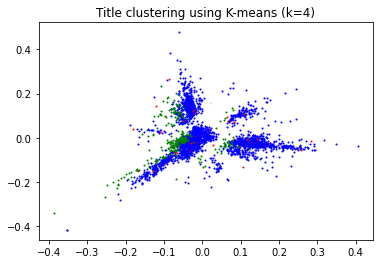

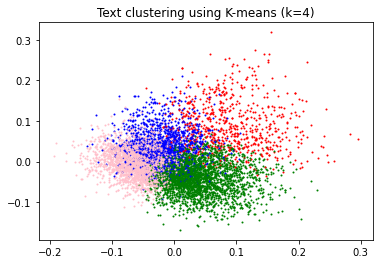

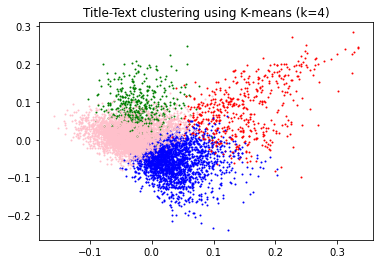

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

for i in range(3):
    model = models[i][0]
    data = title_data
    if i == 1:
        data = text_data
    if i == 2:
        data = title_text_data
        
    reduced_data = PCA(n_components=2).fit_transform(data)
    
    cluster_color_map = {0 : 'red', 1 : 'blue', 2 : 'green', 3 : 'pink' }
    cluster_color = [cluster_color_map[l] for l in model]
    for p in range(len(reduced_data)):
        plt.plot(reduced_data[p, 0], reduced_data[p, 1], "k.", markersize=2, c=cluster_color[p])
    plt.title(models[i][1] ) 
    plt.show()

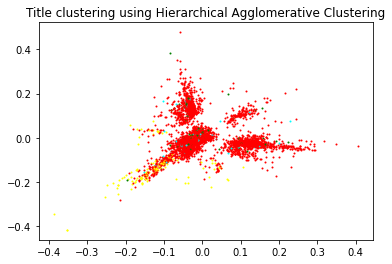

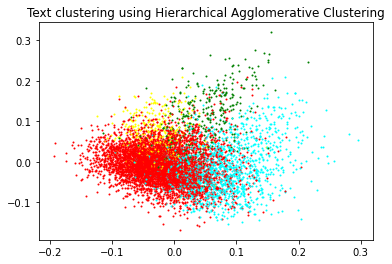

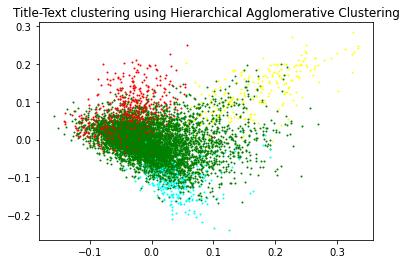

In [ ]:
for i in range(3, 6):
    model = models[i][0]
    data = title_data
    if i == 4:
        data = text_data
    if i == 5:
        data = title_text_data
        
    reduced_data = PCA(n_components=2).fit_transform(data)
    
    cluster_color_map = {0 : 'red', 1 : 'cyan', 2 : 'green', 3 : 'yellow'  }
    cluster_color = [cluster_color_map[l] for l in model]
    for p in range(len(reduced_data)):
        plt.plot(reduced_data[p, 0], reduced_data[p, 1], "k.", markersize=2, c=cluster_color[p])

    plt.title(models[i][1] ) 
    plt.show()

<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    <h1>پیاده‌سازی خزنده (crawler) و واکشی اطلاعات (40 نمره)</h1>
    در این بخش قصد داریم تا برای سایت  ResearchGate یک خزنده پیاده‌سازی کرده و با استفاده از آن اطلاعات تعدادی مقاله را واکشی کنیم. <br>
    اطلاعات مورد نیاز برای جمع‌آوری از هر مقاله، عبارت‌اند از:
<ul>
      <li>ID مقاله</li>
      <li>عنوان مقاله</li>
      <li>چکیده مقاله (برخی از مقالات ممکن است دارای چکیده نباشند. همچنین ممکن است در برخی از صفحات سایت، به جای عبارت Abstract، از عبارت Description برای اشاره به چکیده استفاده‌شده باشد. توصیه می‌کنیم که برخی از صفحات این سایت را بررسی کنید.)
</li>
      <li>سال انتشار</li>
    <li>نام نویسندگان</li>
    <li>لینک صفحه ارجاعات مقاله یا references (10 مورد اول - در صورت موجود نبودن، همان تعداد)</li>
</ul>
برای آغاز واکشی به چند لینک اولیه نیاز است. این لینک‌ها در فایل start.txt قرار دارند. در طول واکشی اطلاعات، لازم است که لینک‌های ارجاعات مقاله (reference) به همین فایل start.txt اضافه شده و برای واکشی‌های بعدی مورداستفاده قرار گیرد. توجه داشته باشید که لینک‌های ذخیره‌شده نباید تکراری باشند. <br>
اطلاعات واکشی شده باید به‌صورت یک فایل json ذخیره شوند. یک نمونه از قالب این فایل در sample.json قرار داده‌شده است. در کل نیاز است که 2000 مقاله واکشی شوند و اطلاعات آن‌ها در یک فایل json با قالب گفته ذخیره گردد. <br><br>
<b>نکات مهم:</b>
    <ul>
        <li>پیشنهاد می‌شود که از کتابخانه‌های selenium و یا scrapy زبان پایتون برای crawl کردن و از کتابخانه CSS Selector برای جستجو و دسترسی به تگ‌های HTML صفحه و محتوای آن‌ها استفاده کنید.
</li>
        <li>برای واکشی اطلاعات، بین هر واکشی یک مقدار delay (برای مثال 5 ثانیه) قرار دهید.</li>
        <li>توجه داشته باشید که فرمت URL هر صفحه در سایت ResearchGate به‌صورت زیر است:
        <div dir='ltr'>
            https://www.researchgate.net/publication/PaperId_PaperTitle
        </div>
        که PaperID و PaperTitle، Id و عنوان مقاله می‌باشند.
        </li>
        <li>برای دسترسی به بخش ارجاعات مقاله، لازم است که عبارت references/ به انتهای URL مقاله اضافه شود و سپس واکشی انجام شود.
</li>
    </ul>
</font>
</div>

In [2]:
!pip install scrapy
import scrapy

     |████████████████████████████████| 254 kB 8.1 MB/s 
     |████████████████████████████████| 251 kB 52.2 MB/s 
     |████████████████████████████████| 3.1 MB 1.8 MB/s 
     |████████████████████████████████| 3.2 MB 41.8 MB/s 
     |████████████████████████████████| 55 kB 3.3 MB/s 
     |████████████████████████████████| 47 kB 4.3 MB/s 
     |████████████████████████████████| 3.6 MB 53.6 MB/s 
     |████████████████████████████████| 65 kB 3.2 MB/s 
     |████████████████████████████████| 74 kB 2.9 MB/s 
  Created wheel for protego: filename=Protego-0.1.16-py3-none-any.whl size=7783 sha256=45f52161543ab374a2c25dd8b503667bd668460284b3349ae4430ecaeed25bff
  Stored in directory: /root/.cache/pip/wheels/ca/44/01/3592ccfbcfaee4ab297c4097e6e9dbe1c7697e3531a39877ab
  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.5-py3-none-any.whl size=11516 sha256=1e9c9a99483a33eab3f2532c40a975b6d5d17ac5f2130a7f80ca96a22de7b195
  Stored in directory: /root/.cache/pip/wheels/2d/18/21/3c6a732eaa6

In [3]:
# paper
TITLE ="//h1[@class='research-detail-header-section__title']/text()"
DATE = "//div[@class='research-detail-header-section__metadata']/div[1]//li/text()"
ABSTRACT = "//div[contains(@class,'research-detail-middle-section__abstract')]/text()"  
AUTHORS = "//div[contains(@class,'nova-legacy-v-person-list-item__title')]/a/text()"
# references 
REFERENCES_LINK = "//div[contains(@class,'nova-legacy-v-publication-item__title')]//@href"

In [ ]:
from scrapy.crawler import CrawlerProcess
import scrapy.crawler as crawler
from twisted.internet import reactor
from scrapy.crawler import CrawlerRunner
from multiprocessing import Process, Queue
import requests
import json

class Article:
  def __init__(self):
    self.id = 0
    self.title = ""
    self.abstract= ""
    self.date = ""
    self.authors = []
    self.references = []

base_dir = '/content/drive/MyDrive/Phase3/'
max_number = 2000
save_place = base_dir + 'storage/'
# save_place = '/content/storage/'
start_file = base_dir + 'start.txt'
urls = []
all_urls = set()
file1 = open(start_file, 'r')
li = file1.readlines()
first = False
for l in li:
  urls.append(l.strip())
  all_urls.add(l.strip())

headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64; rv:48.0) Gecko/20100101 Firefox/48.0'}
class Crawler(scrapy.Spider):
  name = "MyCrawler"


  custom_settings = {
        'LOG_LEVEL': 'INFO',
        'DEPTH_LIMIT': 1,
        'DOWNLOAD_DELAY': 3,
  }

  def start_requests(self):
    global urls
    for url in urls:
        yield scrapy.Request(url=url, callback=self.parse,headers=headers)


  def parse(self, response):
    global all_urls, first

    article = Article()
    article_url = response.url
    name_id = article_url[article_url.find("publication") + 12 :].split("_")
    article.id = name_id[0]
    article.title = ' '.join(map(str, name_id[1:]))
    
  
    article.abstract = response.xpath(ABSTRACT).get()  
    article.date = response.xpath(DATE).get()
    article.authors = response.xpath(AUTHORS).getall()
    refs = response.xpath(REFERENCES_LINK).getall()
    print(article.title)
    # print(article.id)
    # print(article.authors)
    # print(article.abstract)
    # print(article.date)
    # print(refs[::-1][0:10])
    for r in refs[::-1]:
      article.references.append(r[r.find("publication") + 12 :r.find("_")])
      if len(article.references) >= 10: 
        break
    
    # print(article.references)

    save_json_file = open(save_place + str(article.id) +'.json', 'w')
    save_json_file.write(json.dumps(article.__dict__))
    save_json_file.close()

    
    for r in refs[::-1]:
      if len(all_urls) >= max_number: 
        if not first:
          save_file = open(save_place + 'result1.txt', 'a')
          for u in all_urls:
            save_file.write(str(u)+'\n')
          save_file.close()
          first = True
        break
      url_ = "https://www.researchgate.net/" + r
      if url_ not in all_urls:
        all_urls.add(url_)
        yield scrapy.Request(url=url_, callback=self.parse)
  

def run_spider(spider):
    def f(q):
        try:
            runner = crawler.CrawlerRunner()
            deferred = runner.crawl(spider)
            deferred.addBoth(lambda _: reactor.stop())
            reactor.run()
            q.put(None)
        except Exception as e:
            q.put(e)

    q = Queue()
    p = Process(target=f, args=(q,))
    p.start()
    result = q.get()
    p.join()

    if result is not None:
        raise result

run_spider(Crawler)

<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    <h1>ارزش‌گذاری مقالات و رتبه‌بندی نویسنده‌ها (10 + 10 نمره)</h1>
    <h2>ارزش‌گذاری مقالات با الگوریتم PageRank (10 نمره)</h2>
    در این قسمت شما باید مقدار PageRank مقالات واکشی شده را که در فایل json کراول شده است و حاوی ۲۰۰۰ مقاله است، محاسبه کرده و یک فایل با نام PageRank.json با فرمت زیر ذخیره کنید.
      <div dir="ltr">
            <pre class="line-numbers">
               <code class="language-css">
{
    &ltPaperID1&gt: &ltPageRankValue1&gt,
    &ltPaperID2&gt: &ltPageRankValue2&gt,
    .
    .
    .
}
               </code>
            </pre>
      </div> 
    <b>ورودی</b>
    <ul>
        <li>فایل json حاوی مقالات کراول شده</li>
        <li>مقدار alpha یا teleporting parameter</li>
    </ul>  
    <b>خروجی</b>
    <ul>
        <li>فایل PageRank.json </li>
    </ul>
</font>
</div>

In [ ]:
import networkx as nx
from os import listdir
from os.path import isfile, join
from networkx.exception import NetworkXError

 
class Article:
  def __init__(self, id, title, abstract, date, authors, references):
    self.id = id
    self.title = title
    self.abstract= abstract
    self.date = date
    self.authors = authors
    self.references = references

def pagerank(G, alpha):

    personalization=None
    max_iter=100
    tol=1.0e-6
    weight='weight'
    if len(G) == 0:
        return {}
 
    if not G.is_directed():
        D = G.to_directed()
    else:
        D = G
 
    # Create a copy in (right) stochastic form
    W = nx.stochastic_graph(D, weight=weight)
    N = W.number_of_nodes()
 
    x = dict.fromkeys(W, 1.0 / N)
    
 
    if personalization is None:
 
        # Assign uniform personalization vector if not given
        p = dict.fromkeys(W, 1.0 / N)
    else:
        missing = set(G) - set(personalization)
        if missing:
            raise NetworkXError('Personalization dictionary '
                                'must have a value for every node. '
                                'Missing nodes %s' % missing)
        s = float(sum(personalization.values()))
        p = dict((k, v / s) for k, v in personalization.items())
 
    
    dangling_weights = p
    
    dangling_nodes = [n for n in W if W.out_degree(n, weight=weight) == 0.0]
 
    # power iteration: make up to max_iter iterations
    for _ in range(max_iter):
        xlast = x
        x = dict.fromkeys(xlast.keys(), 0)
        danglesum = alpha * sum(xlast[n] for n in dangling_nodes)
        for n in x:
 
            # this matrix multiply looks odd because it is
            # doing a left multiply x^T=xlast^T*W
            for nbr in W[n]:
                x[nbr] += alpha * xlast[n] * W[n][nbr][weight]
            x[n] += danglesum * dangling_weights[n] + (1.0 - alpha) * p[n]
 
        # check convergence, l1 norm
        err = sum([abs(x[n] - xlast[n]) for n in x])
        if err < N*tol:
            return x
    raise NetworkXError('pagerank: power iteration failed to converge '
                        'in %d iterations.' % max_iter)
    
def find_page_rank(file_path,alpha): 
  G=nx.Graph()
  onlyfiles = [f for f in listdir(file_path) if isfile(join(file_path, f))]
  print(len(onlyfiles))
  
  for f in onlyfiles:
    if f.__contains__('.json'):
      file_ = open(file_path + '/' + f, "r")
      ff =file_.read()
      try:
        j = json.loads(ff[0:len(ff)-2])
      except:
        j = json.loads(ff)
      u = Article(**j)
      for refr in u.references:
        G.add_edge(u.id, refr)

  output = pagerank(G, alpha)
  print(output)
  f = open(base_dir + "PageRank.json", "w")
  f.write(str(output))
  f.close()

find_page_rank(base_dir + 'storage/', 0.85)

<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    <h2>رتبه‌بندی نویسنده‌ها با الگوریتم HITS (10 نمره امتیازی)</h2>
    حال که ارجاع میان مقالات را مورد بررسی قرار دادیم می خواهیم به رتبه‌بندی نویسندگان مقاله بر اساس HITS بپردازیم. میگوییم فرد الف به فرد ب ارجاع دارد اگر فرد الف مقاله ای نوشته باشد که به مقاله ای از فرد ب ارجاع پیدا کرده باشد. در این حالت یک یال از فرد الف به فرد ب در گراف مدل نویسندگان رسم می‌کنیم. <br>
    حال با تعریف ذکر شده با محاسبه شاخص authority , hub نویسندگان را بر اساس authority رتبه بندی کنید. <br> 
    <b>ورودی</b>
    <ul>
        <li>فایل json حاوی ۲۰۰۰ مقاله </li>
        <li>تعداد نویسندگان برتر مورد نظر(n)</li>
    </ul>  
    <b>خروجی</b>
    <ul>
        <li>لیست n نویسنده برتر  </li>
    </ul>
    برای پیاده سازی HITS برای تعداد دفعات اجرای حلقه می‌توانید عدد ۶ را در نظر بگیرید.
</font>
</div>

In [ ]:
import operator

def hits(graph, iterations, tolarance=1.0e-8):
    hubs = dict.fromkeys(graph, 1.0 / graph.number_of_nodes())
    authorities = {}
    # power iteration, which stops after given iterations or reaching tolerance
    for _ in range(iterations):
        last_hubs = hubs
        hubs = dict.fromkeys(last_hubs.keys(), 0)
        authorities = dict.fromkeys(last_hubs.keys(), 0)
        for node in hubs:
            for neighbor in graph[node]:
                authorities[neighbor] += last_hubs[node] * graph[node][neighbor].get('weight', 1)
        for node in hubs:
            for neighbor in graph[node]:
                hubs[node] += authorities[neighbor] * graph[node][neighbor].get('weight', 1)
        scaling = 1.0 / max(hubs.values())
        for node in hubs:
            hubs[node] *= scaling
        scaling = 1.0 / max(authorities.values())
        for node in authorities:
            authorities[node] *= scaling
        err = sum([abs(hubs[node] - last_hubs[node]) for node in hubs])
        if err < tolarance:
            break
    return hubs, authorities

def get_n_best(input_file, number):
  G = nx.DiGraph()

  onlyfiles = [f for f in listdir(input_file) if isfile(join(input_file, f))]
  for f in onlyfiles:
    if f.__contains__('.json'):
      file_ = open(input_file + '/' + f, "r")
      ff =file_.read()
      try:
        j = json.loads(ff[0:len(ff)-2])
      except:
        j = json.loads(ff)
      u = Article(**j)
      for ref in u.references:
        if isfile(input_file + '/' + ref + '.json'):
          file_ = open(input_file + '/' + ref + '.json', "r")
          ref_ff =file_.read()
          try:
            ref_j = json.loads(ref_ff[0:len(ref_ff)-2])
          except:
            ref_j = json.loads(ref_ff)
          
          ref_u = Article(**ref_j)
          for auth in u.authors:
            for ref_auth in ref_u.authors:
              G.add_edge(auth, ref_auth)        

  output = hits(G, 6)
  x = output[0]
  sorted_x = sorted(x.items(), key=operator.itemgetter(1))

  print(sorted_x[::-1][0:number+1])

get_n_best("/content/drive/MyDrive/Phase3/storage", 10)